# Combing Question Results
### Need: subjects_T0, subjects_T3 and subjects_Tc created by the make_T0_csvfiles.py, make_T3_csvfiles.py, make_Tc_csvfiles.py
This notebook looks at the results of the question: 'Do you see one or several jets in this movie strip?', the possible answers are yes or no.
This question is asked during both the Jet or Not workflow and the Box the Jet workflow, so we can compare the answers from the volunteers. 
The results of from the first launch showed a large portion of subjects switching from yes to no, so the retirement limit was increased for the second launch. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

First we load in the subjects, the ans either 'y' or 'n' based on if the orginal answers said more than 50% yes or more than 50% no
agreement is equal to #Most common answer/#total answers

In [3]:
subjects,obs_time,end_date,ans_T0,agreement,subject_file_T0, subject_sol_T0=np.loadtxt('JetOrNot/subjects_{}.csv'.format('T0'),delimiter=',',unpack=True,dtype=str)
obs_time_T0=np.array(obs_time,dtype='datetime64')
end_date_T0=np.array(end_date,dtype='datetime64')
subjects_T0=subjects.astype(int)
agreement_T0=agreement.astype(float)

subjects,obs_time,end_date,ans_T3,agreement,subject_file_T3, subject_sol_T3=np.loadtxt('BoxTheJets/subjects_{}.csv'.format('T3'),delimiter=',',unpack=True,dtype=str)
obs_time_T3=np.array(obs_time,dtype='datetime64')
end_date_T3=np.array(end_date,dtype='datetime64')
subjects_T3=subjects.astype(int)
agreement_T3=agreement.astype(float)

subjects,obs_time,end_date,ans_Tc,agreement,subject_file_Tc, subject_sol_Tc=np.loadtxt('subjects_{}.csv'.format('Tc'),delimiter=',',unpack=True,dtype=str)
obs_time_Tc=np.array(obs_time,dtype='datetime64')
end_date_Tc=np.array(end_date,dtype='datetime64')
subjects_Tc=subjects.astype(int)
agreement_Tc=agreement.astype(float)

Plot the results as bar graphs, red stands for 'no' given as most likley answer while green stands for 'yes' most given answer.

Jet/Not workflow 1209 2752 3961
Box the Jet question 801 415 1216
Combined results 850 3111 3961


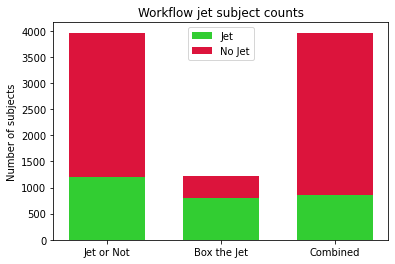

In [4]:
#Get the agreements masks
jet_mask_T0, non_jet_mask_T0= ans_T0=='y', ans_T0=='n'
jet_mask_T3, non_jet_mask_T3= ans_T3=='y', ans_T3=='n'
jet_mask_Tc, non_jet_mask_Tc= ans_Tc=='y', ans_Tc=='n'

print('Jet/Not workflow', np.count_nonzero(jet_mask_T0),np.count_nonzero(non_jet_mask_T0),len(subjects_T0))
plt.bar(0,np.count_nonzero(jet_mask_T0),color='limegreen',width=0.1,label='Jet')
plt.bar(0,np.count_nonzero(non_jet_mask_T0),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_T0),label='No Jet')

#Second workflow
print('Box the Jet question',np.count_nonzero(jet_mask_T3),np.count_nonzero(non_jet_mask_T3),len(subjects_T3))
plt.bar(0.15,np.count_nonzero(jet_mask_T3),color='limegreen',width=0.1)
plt.bar(0.15,np.count_nonzero(non_jet_mask_T3),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_T3))

#Combined results
print('Combined results',np.count_nonzero(jet_mask_Tc),np.count_nonzero(non_jet_mask_Tc),len(subjects_Tc))
plt.bar(0.3,np.count_nonzero(jet_mask_Tc),color='limegreen',width=0.1)
plt.bar(0.3,np.count_nonzero(non_jet_mask_Tc),color='crimson',width=0.1,bottom=np.count_nonzero(jet_mask_Tc))

plt.ylabel('Number of subjects')
plt.xticks([0,0.15,0.3],['Jet or Not','Box the Jet','Combined'])
plt.title('Workflow jet subject counts')
plt.legend()
#plt.savefig('T0T3Tc_counts.png')
plt.show()
        

In the case of the first launch we saw a lot of subject go from 'yes' to 'no' during the second workflow. 
Since we want the workflows to go as fast as possible, we would like to filter out these non subjects earlier. 
We take a look at the agreement these subjects had after the first workflow and compare that to the agreement after the second workflow.

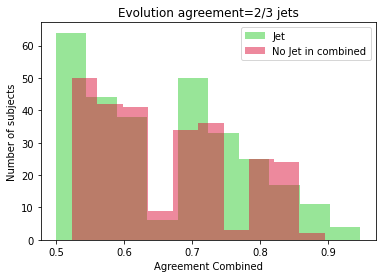

In [5]:
#Which subjects that had 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0==2/3 #mask where is the agreement 1st 0.66
y=ans_T0=='y' #Agreement where jet is found in 1st workflow
nc=ans_Tc=='n' #Agreement where Combined says no Jet
yc=ans_Tc=='y' #Agreement where Combined says Jet

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution agreement=2/3 jets')
plt.legend()
#plt.savefig('Evo_agr_0.667.png')
plt.show()

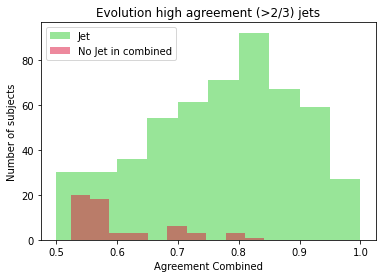

In [6]:
#Which subjects that had higher than 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0>2/3 #mask where is the agreement 0.66

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution high agreement (>2/3) jets')
plt.legend()
#plt.savefig('Evo_agr_high.png')
plt.show()

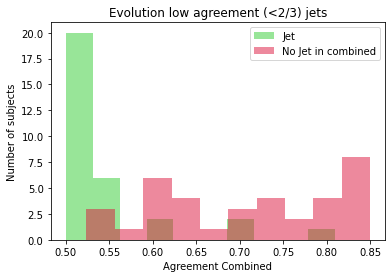

In [7]:
#Which subjects that had less than 0.66 agreement in 1st workflow stay jets after second workflow
i=agreement_T0<2/3 #mask where is the agreement 0.66

plt.hist(agreement_Tc[i&yc],alpha=0.5,color='limegreen',label='Jet')
plt.hist(agreement_Tc[i&nc&y],alpha=0.5,color='crimson',label='No Jet in combined') #Locations where 1st says yes but combined says no
plt.xlabel('Agreement Combined')
plt.ylabel('Number of subjects')
plt.title('Evolution low agreement (<2/3) jets')
plt.legend()
#plt.savefig('Evo_agr_low.png')
plt.show()

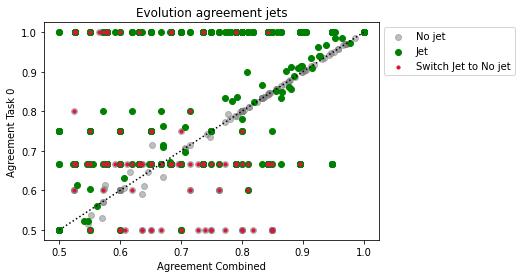

In [8]:
y=ans_T0=='y' #Agreement where jet is found in 1st workflow
n=ans_Tc=='n' #agreement where no jet is found in 1st workflow
nc=ans_Tc=='n' #Agreement where Combined says no Jet
yc=ans_Tc=='y' #Agreement where Combined says Jet
plt.scatter(agreement_Tc[nc&n],agreement_T0[nc&n],color='grey',alpha=0.5,label='No jet')
plt.scatter(agreement_Tc[yc&n],agreement_T0[yc&n],color='pink',alpha=0.5) #This does not occur no jet is not put through and then becomes a jet
plt.scatter(agreement_Tc[yc&y],agreement_T0[yc&y],color='green', label='Jet')
plt.scatter(agreement_Tc[nc&y],agreement_T0[nc&y],color='crimson',label='Switch Jet to No jet',s=10)
plt.plot(np.linspace(0.5,1,2),np.linspace(0.5,1,2),linestyle='dotted',color='black')
plt.xlabel('Agreement Combined')
plt.ylabel('Agreement Task 0')
plt.legend(bbox_to_anchor=(1.0, 1.0, 0, 0), loc='upper left')
plt.title('Evolution agreement jets')
#plt.savefig('Evo_agr_jet.png',bbox_inches='tight')
plt.show()


We also check for inconsitensies:     
The subjects are being put through to the second workflow if we have 2 out of 3 saying yes, this will count the first 3 votes and    
push it to new workflow even if all others later say no. Meaning a subject of which we say it has 'no' as final answer will appear in the next workflow.    
Also Caesar will count one volunteer as one vote even if he votes multiple times, while our code does not have that extra information  
    e.q. 70444529 is checked by a volunteer twice so it will not be put through unless another volunteer says yes  
    in this case the next volunteer said no so Ceasar did not push it through to the next workflow  

In [9]:
jet_subjects = subjects_T0[jet_mask_T0]
non_jet_subjects = subjects_T0[non_jet_mask_T0]

for s in non_jet_subjects: #See which subjects which we count as non_jets are pushed by Caesar
    if s in subjects_T3:
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i])
        #print (data_T3[data_T3['subject_id']==s])
print(' ')
for s in jet_subjects: #See which subjects which we count as jets are not pushed by Caesar
    if s not in subjects_T3:
        i=np.where(subjects_T0==s)
        print(subjects_T0[i],obs_time_T0[i],ans_T0[i],agreement_T0[i])
        
for s in subjects_T3: #There is only one subject not in the previous
    if s not in subjects_T0:
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i]) #A test example, only one vote
    if len(np.where(subjects_T3==s))>1: #No double subjects in data2
        i=np.where(subjects_T3==s)
        print(subjects_T3[i],obs_time_T3[i],ans_T3[i],agreement_T3[i])



        


[70439689] ['2011-01-21T11:55:44'] ['n'] [0.8125]
[70440305] ['2011-07-08T06:53:44'] ['n'] [0.875]
[70440415] ['2011-08-01T04:34:56'] ['n'] [0.625]
[70440466] ['2011-08-01T09:04:56'] ['n'] [0.75]
[70440639] ['2011-12-30T15:11:44'] ['y'] [0.5]
[70440651] ['2011-12-31T16:31:08'] ['n'] [0.8125]
[70440835] ['2011-12-11T23:27:20'] ['y'] [0.5]
[70444807] ['2012-10-19T06:54:19'] ['n'] [0.8125]
[70444811] ['2012-10-19T22:15:31'] ['y'] [0.52631579]
[70444814] ['2012-10-19T22:25:55'] ['n'] [0.8125]
[70444820] ['2012-10-19T22:46:43'] ['n'] [0.8125]
[70444824] ['2012-10-19T22:57:19'] ['n'] [0.8125]
[70444827] ['2012-10-19T23:07:43'] ['n'] [0.6]
[70444829] ['2012-10-19T23:12:55'] ['n'] [0.61111111]
[70444844] ['2012-10-20T22:25:55'] ['n'] [0.6875]
[70444857] ['2012-10-20T23:12:55'] ['n'] [0.7]
[70444882] ['2012-12-29T09:51:31'] ['y'] [0.52941176]
[70444910] ['2012-12-29T14:57:31'] ['n'] [0.66666667]
[70444921] ['2012-12-30T01:00:07'] ['n'] [0.75]
[70444941] ['2012-12-30T01:57:31'] ['y'] [0.625]
 
[

And some final first statistics on the amount of consecutive jet subjects which we call jet clusters. 

In [10]:
def print_stat(task,path):
    SOL_small,subjects,filenames,times,Num,start,end,notes=np.loadtxt('{}SOL_{}_stats.csv'.format(path,task),delimiter=',',unpack=True,dtype=str)
    Num=Num.astype(float)
    print('For task {} we have:'.format(task))
    print('In total there are {} jets clusters found inside the events'.format(sum(Num)))
    print('There are {} events without jets'.format(len(np.argwhere(Num==0))))
    print('Event {} has the maximum jets with a total of {} jets'.format(SOL_small[np.argmax(Num)],max(Num)))
    #print('The events with no jets are {}'.format(SOL_small[np.where(Num==0)]))
    print('There are {} events with some flagged jets'.format(len(SOL_small[np.where(notes!='')]),SOL_small[np.where(notes!='')]))
    print('There are {} events with no flagged jets'.format(len(SOL_small[np.where(notes=='')])))
    #Jet s in these clusters without flag
    #Jetcluster start and end 
    
    return SOL_small,Num,start,end,notes

In [11]:
T0_SOL_small,T0_Num,T0_start,T0_end,T0_notes=print_stat('T0','JetOrNot/')
print(' ')
T3_SOL_small,T3_Num,T3_start,T3_end,T3_notes=print_stat('T3','BoxTheJets/')
print(' ')
Tc_SOL_small,Tc_Num,Tc_start,Tc_end,Tc_notes=print_stat('Tc','')


For task T0 we have:
In total there are 468.0 jets clusters found inside the events
There are 13 events without jets
Event SOL2012-12-16T00:00:03L088C079 has the maximum jets with a total of 39.0 jets
There are 77 events with some flagged jets
There are 44 events with no flagged jets
 
For task T3 we have:
In total there are 190.0 jets clusters found inside the events
There are 16 events without jets
Event SOL2011-05-28T00:00:02L027C078 has the maximum jets with a total of 13.0 jets
There are 40 events with some flagged jets
There are 67 events with no flagged jets
 
For task Tc we have:
In total there are 288.0 jets clusters found inside the events
There are 24 events without jets
Event SOL2012-12-16T00:00:03L088C079 has the maximum jets with a total of 34.0 jets
There are 64 events with some flagged jets
There are 57 events with no flagged jets


In [12]:
print(Tc_Num[(T0_notes!='')&(Tc_notes=='')])
print(Tc_SOL_small[(T0_notes!='')&(Tc_notes=='')])
print(Tc_notes[Tc_SOL_small=='SOL2012-12-16T00:00:03L088C079'])
print(T0_notes[Tc_SOL_small=='SOL2012-12-16T00:00:03L088C079'])

[1. 0. 0. 1. 1. 0. 2. 3. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.]
['SOL2011-04-01T03:00:11L222C115' 'SOL2011-03-01T12:18:04L189C096'
 'SOL2011-12-31T16:20:24L152C112' 'SOL2011-11-28T11:30:00L225C061'
 'SOL2012-07-20T16:30:04L249C058' 'SOL2012-03-07T20:40:12L251C019'
 'SOL2012-03-17T23:20:12L248C164' 'SOL2012-06-23T06:00:04L315C163'
 'SOL2012-11-14T07:00:03L193C134' 'SOL2012-11-14T07:00:03L192C134'
 'SOL2012-09-24T02:10:11L274C041' 'SOL2013-03-13T07:38:27L112C078'
 'SOL2013-01-16T21:00:35L190C016' 'SOL2013-07-24T10:51:22L163C094'
 'SOL2013-07-24T22:05:03L231C077' 'SOL2013-08-03T01:30:35L006C006'
 'SOL2013-08-03T05:40:11L339C118' 'SOL2013-12-22T12:15:00L043C078']
[' 01 2012-12-16 08:58:19 01 2012-12-16 11:34:19 01 2012-12-16 14:25:55 01 2012-12-16 14:49:19 01 2012-12-16 15:59:31 01 2012-12-16 17:33:07 01 2012-12-16 17:48:43 01 2012-12-16 20:16:55 01 2012-12-16 20:55:55 01 2012-12-17 00:12:07 01 2012-12-17 00:36:43 01 2012-12-17 01:15:43 01 2012-12-17 02:49:19 01 2012-12-17 06:35:31 01 2012-12-17 0